In [1]:
import pandas as pd
from midiutil import MIDIFile

In [2]:
file_name='net_data/laptop.csv'

In [3]:
#with open(file_name, 'r') as fh:
#    data = csv.reader(fh, delimiter=',', quotechar='|')
#    for datum in data:
#        print(datum)
phone_df = pd.read_csv(file_name, header=None)
phone_df.columns = ['Channel', 'Time', 'Source', 'Target', 'Data']
phone_df['Channel'] = phone_df['Channel'].replace('NaN', 0.0)
phone_df.head()

,Channel,Time,Source,Target,Data
0,NaN,1612192594,NaN,NaN,NaN
1,NaN,1612192601,192.168.1.1,224.0.0.1,NaN
2,NaN,1612192601,192.168.1.2,224.0.0.251,NaN
3,NaN,1612192602,192.168.1.6,224.0.0.251,NaN
4,NaN,1612192609,NaN,NaN,NaN


In [4]:
#Get the first time
start = phone_df['Time'].min()

In [5]:
track    = 0
channel  = 0
time     = 0    # In beats
duration = 1    # In beats
tempo    = 60   # In BPM
volume   = 100  # 0-127, as per the MIDI standard

In [27]:
# One track, defaults to format 1 (tempo track is created automatically)
#set traacks to max number of streams connected
#num_tracks = int(phone_df['Channel'].max())
MyMIDI = MIDIFile(1)  
MyMIDI.addTempo(track, time, tempo)

In [30]:
for _, row in phone_df.iterrows():
    if type(row['Source']) is not float and type(row['Target']):
        #channel = int(row['Channel'])
        source = int(row['Source'].split('.')[0])
        _time = int(row['Time']-start)

        #create a note for the source
        MyMIDI.addNote(0, 1, source, _time, 0.1, 60)
        #create a slight offset note for the target
        target = int(row['Target'].split('.')[0])
        targettime = int(_time + 1)
        MyMIDI.addNote(0, channel, target, targettime, 0.1, 40)

In [31]:
with open(file_name[:-4]+".mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)

In [25]:
import math
net = phone_df[["Source", "Target"]].value_counts()
math.ceil(net.size/10)
net.iloc[20:30]

Source                   Target                 
192.168.1.1              192.168.1.255              1
17.253.54.125            192.168.1.2                1
192.168.1.2,192.168.1.1  192.168.1.1,192.168.1.2    1
192.168.1.2              17.253.54.253              1
17.253.52.253            192.168.1.2                1
192.168.1.2              17.253.54.125              1
                         17.253.52.253              1
17.253.54.253            192.168.1.2                1
dtype: int64

In [31]:
math.ceil(phone_df.size/1000)

72

In [70]:
import networkx as nx
graph = nx.Graph()

#old = pd.Series()
#let's get the nunber of steps
for ip in range(math.ceil(phone_df.size/100)):
    idx = ip* 10
    #slice the dataframe and convert into a series
    net = phone_df.iloc[idx:(idx+100), 2:4].value_counts()
    for ips, occur in net.iteritems():
        graph = nx.Graph()
        graph.add_node(ips[0])
        graph.add_node(ips[1])
        graph.add_edge(ips[0], ips[1], weight=occur)
        ip_search = "46.4.77.182"
        ips = dict(nx.all_pairs_shortest_path(graph))
        if ip_search in ips:
            print(idx)
            print(ips[ip_search])
        

0
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
0
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
10
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
10
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
20
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
20
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
70
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
70
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
80
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
80
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
90
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
90
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
100
{'

1400
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
1400
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
1410
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
1410
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
1420
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
1420
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
1430
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
1430
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
1440
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
1440
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
1450
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
1450
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.18

2520
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
2520
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
2530
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
2530
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
2540
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
2540
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
2550
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
2550
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
2560
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
2560
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
2570
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
2570
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.18

3540
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
3540
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
3550
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
3550
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
3560
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
3560
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
3570
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
3570
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
3580
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
3580
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
3590
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
3590
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.18

4440
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
4440
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
4450
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
4450
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
4460
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
4460
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
4470
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
4470
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
4480
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
4480
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
4490
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
4490
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.18

5280
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
5280
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
5290
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
5290
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
5300
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
5300
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
5310
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
5310
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
5320
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
5320
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
5330
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
5330
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.18

6190
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
6190
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
6200
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
6200
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
6210
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
6210
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
6220
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
6220
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
6230
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
6230
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
6240
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.182', '192.168.1.2']}
6240
{'46.4.77.182': ['46.4.77.182'], '192.168.1.2': ['46.4.77.18

In [ ]:
import matplotlib.pyplot as plt

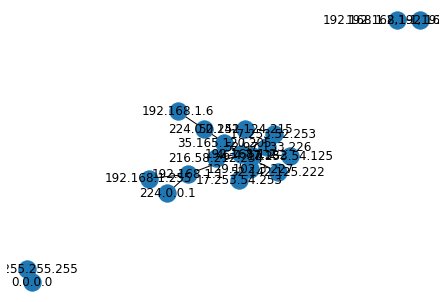

In [41]:
nx.draw(graph, with_labels=True)

In [15]:
dict(nx.all_pairs_shortest_path(graph))

{'10.8.0.1': {'10.8.0.1': ['10.8.0.1'],
  '46.4.77.182': ['10.8.0.1', '46.4.77.182'],
  '52.40.148.33': ['10.8.0.1', '52.40.148.33'],
  '129.102.3.227': ['10.8.0.1', '129.102.3.227'],
  '172.217.20.138': ['10.8.0.1', '172.217.20.138'],
  '40.70.161.102': ['10.8.0.1', '40.70.161.102'],
  '34.107.247.91': ['10.8.0.1', '34.107.247.91'],
  '192.229.233.50': ['10.8.0.1', '192.229.233.50'],
  '74.125.133.188': ['10.8.0.1', '74.125.133.188'],
  '95.215.175.2': ['10.8.0.1', '95.215.175.2'],
  '85.199.214.98': ['10.8.0.1', '85.199.214.98'],
  '81.21.65.168': ['10.8.0.1', '81.21.65.168'],
  '51.89.151.183': ['10.8.0.1', '51.89.151.183'],
  '10.94.137.135': ['10.8.0.1', '46.4.77.182', '10.94.137.135'],
  '52.214.46.80': ['10.8.0.1', '46.4.77.182', '10.94.137.135', '52.214.46.80'],
  '40.70.161.7': ['10.8.0.1', '46.4.77.182', '10.94.137.135', '40.70.161.7']},
 '46.4.77.182': {'46.4.77.182': ['46.4.77.182'],
  '10.8.0.1': ['46.4.77.182', '10.8.0.1'],
  '10.94.137.135': ['46.4.77.182', '10.94.137.13